Histograms and Intensity Transformations

In [ ]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Helper Functions

In [4]:
# Define a helper function to display two images side by side
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [5]:
# Define a helper function to plot two histograms side by side
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

Example image

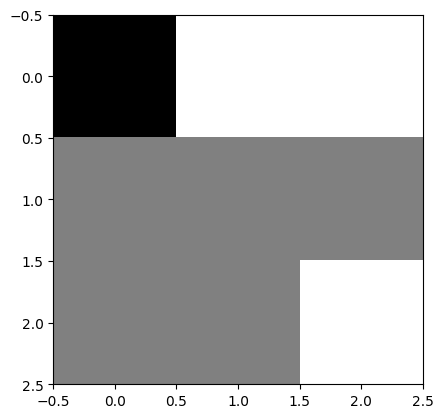

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [6]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

In [42]:
# Create a histogram of different intensities
toy_hist = cv2.calcHist([toy_image],[0],None,[3],[0,3])
toy_hist = np.array(toy_hist, dtype=int).flatten()

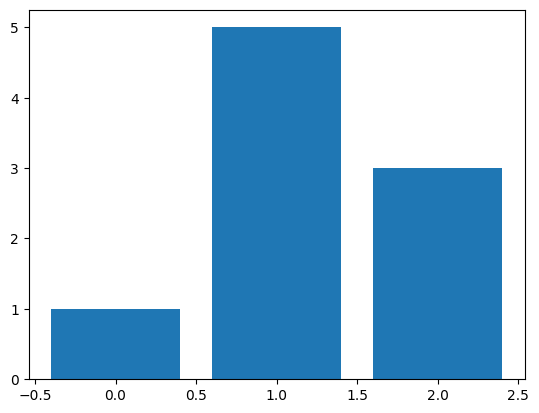

In [44]:
plt.bar([x for x in range(3)], toy_hist)
plt.show()

Real Gray Scale Image Histograms

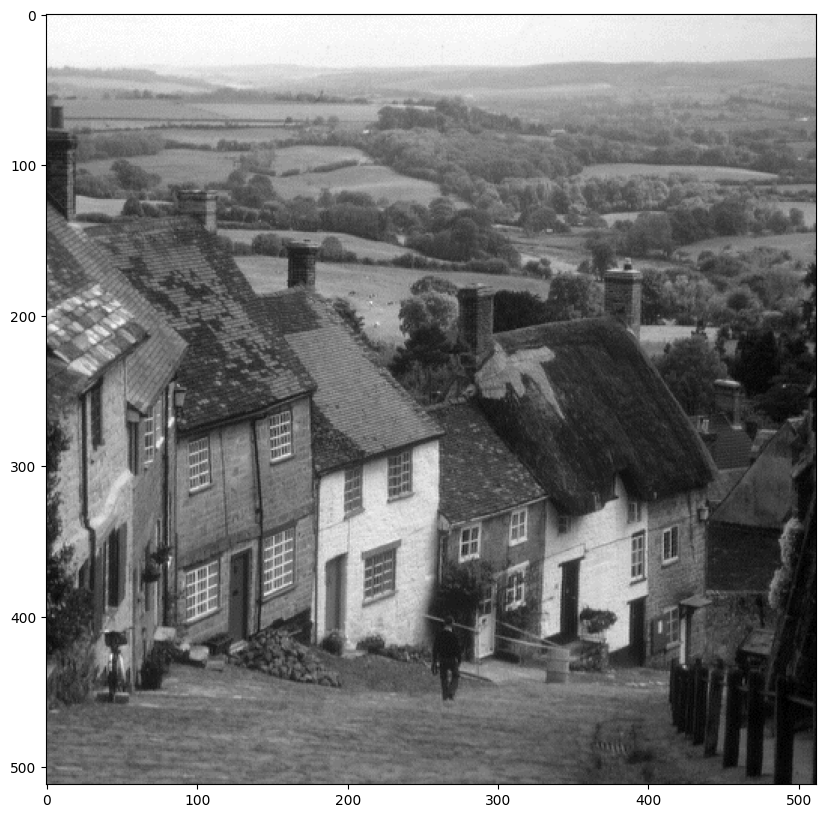

In [45]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

In [46]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])

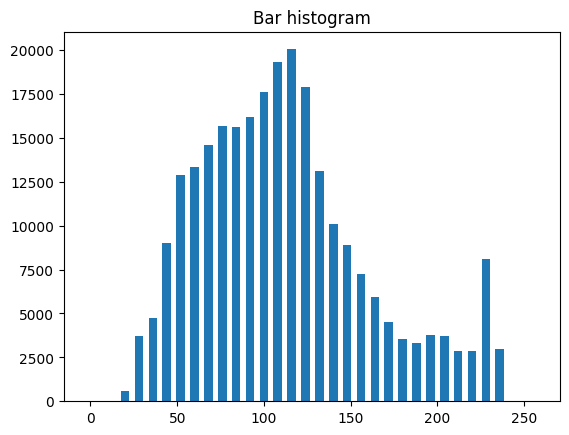

In [47]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [48]:
# Convert to a probability mass function -> normalize it by the number of pixels
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

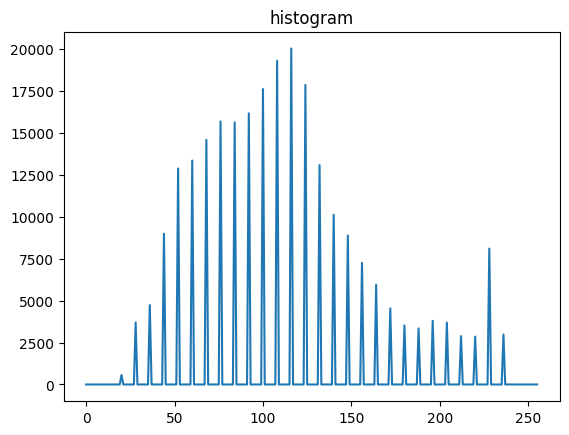

In [49]:
# Plot as a continuous function
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

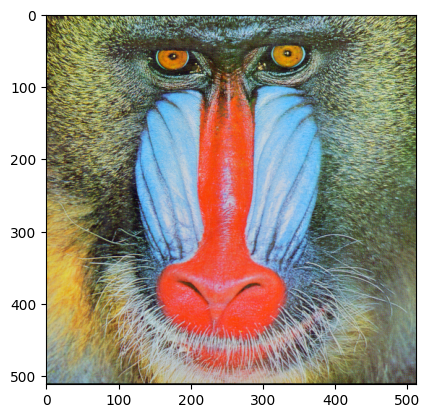

In [50]:
# Now with color images
baboon = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

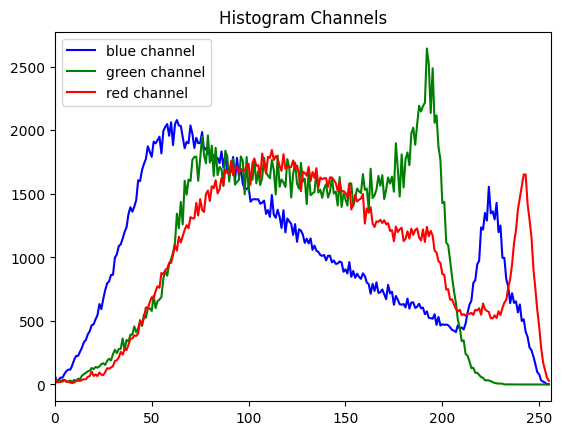

In [51]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

Intensity Transformations: Image Negatives

In [52]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


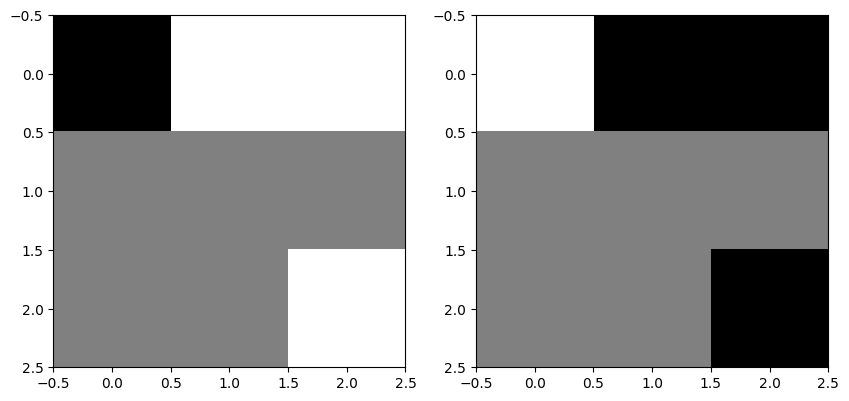

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [53]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

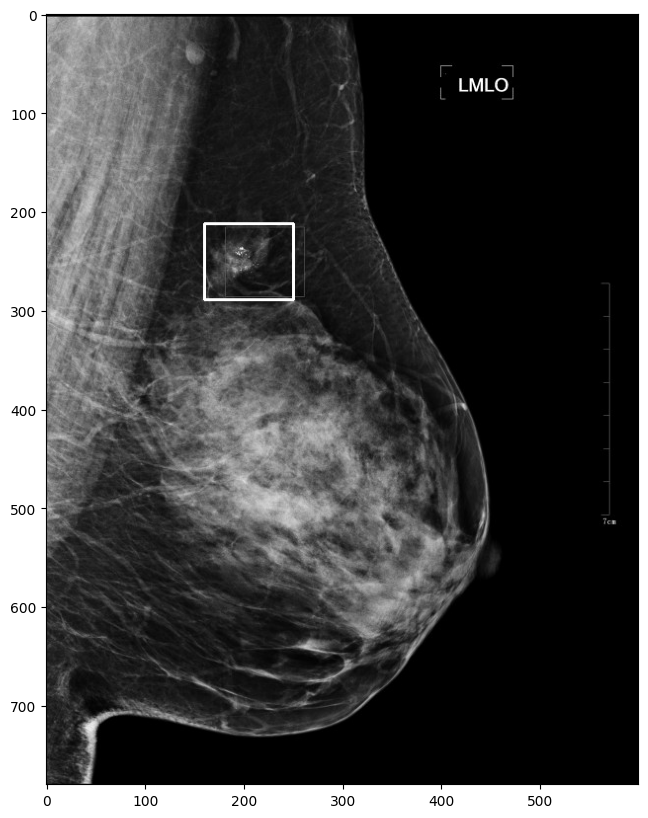

In [54]:
# Now with a real image from a mammogram
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [55]:
img_neg = -1 * image + 255

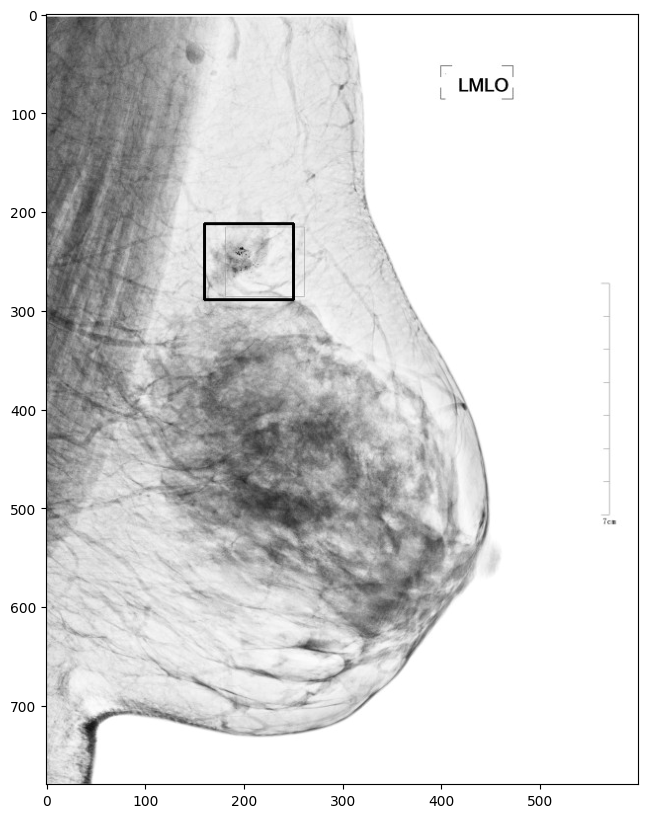

In [56]:
# The negative image is easier to analyze

plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

Intensity Transformations: Brightness and Contrast Adjustments

In [57]:
# In a linear function, the coefficient controls contrast and the intercept controls brightness
alpha = 1 # Simple contrast control (1 means no change)
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

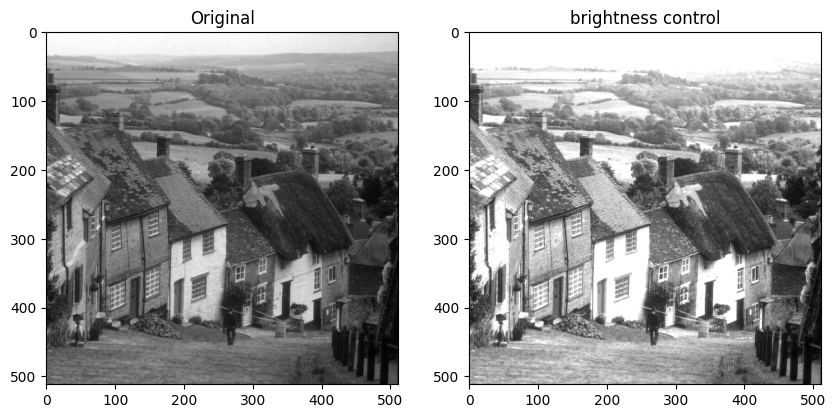

In [59]:
plot_image(goldhill, new_image, title_1 = "Original", title_2 = "brightness control")

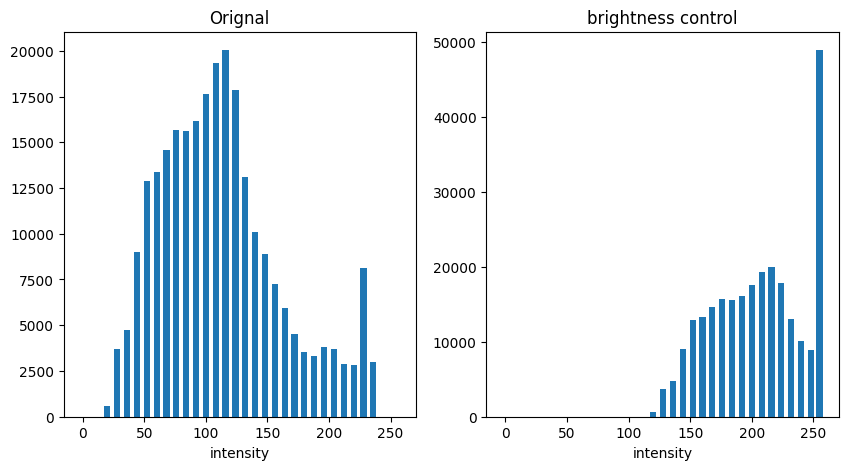

In [60]:
# See the shift in the histograms
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

In [61]:
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control (0 means no change)
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

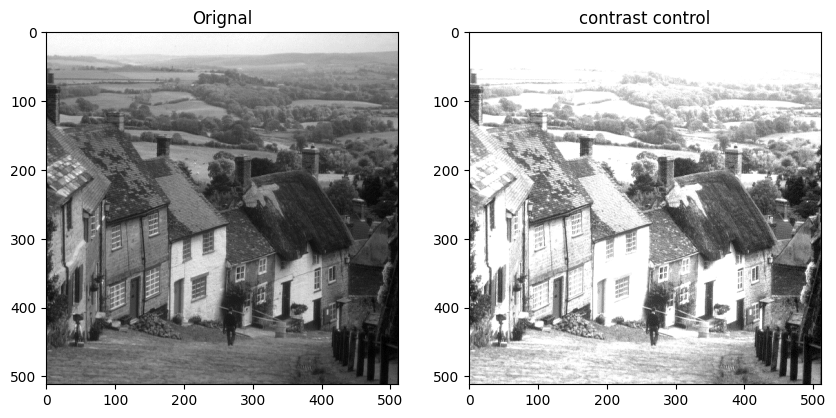

In [62]:
plot_image(goldhill,new_image,"Orignal","contrast control")

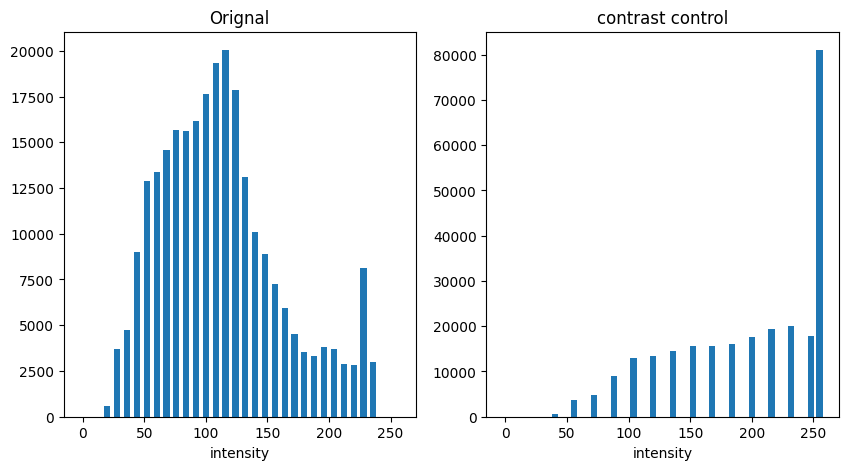

In [63]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Orignal","contrast control")

In [64]:
# Try keeping the image from becoming too bright by increasing contrast and decreasing brightness
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

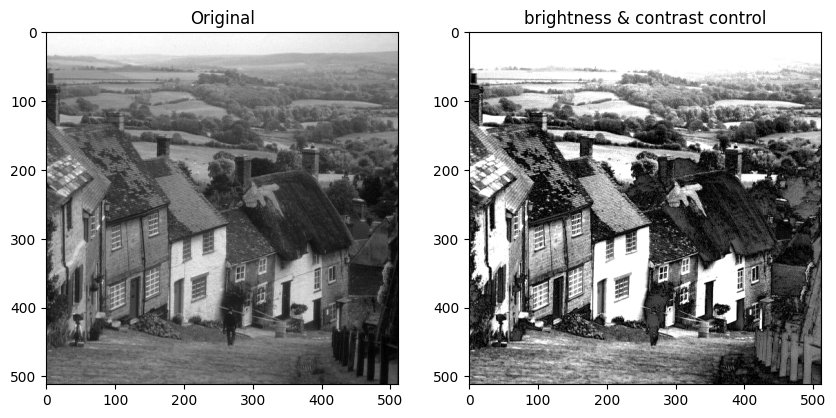

In [65]:
plot_image(goldhill, new_image, "Original", "brightness & contrast control")

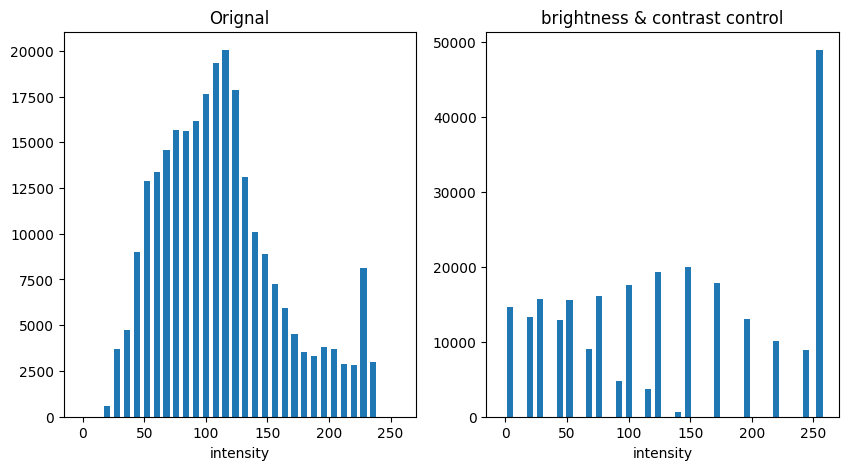

In [66]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")

Intensity Transformations: Histogram Equalization